In [140]:
import tensorflow as tf
import torch

In [141]:
from keras.datasets import mnist

In [142]:
import matplotlib.pyplot as plt
import numpy as np

In [143]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [144]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


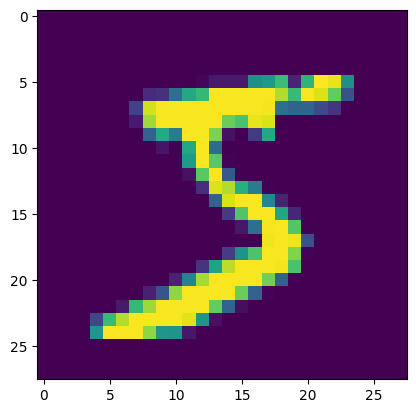

In [145]:
plt.imshow(X_train[0])

In [146]:
X_train=X_train/255
X_test=X_test/255

In [147]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).squeeze(1)
y_train_tensor = torch.tensor(y_train,dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test,dtype=torch.long)

In [148]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

In [149]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

In [150]:
import torch.nn.functional as F

In [151]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.fc1 = nn.Linear(28*28,256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256,128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self,x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
model = Model()

In [152]:
lossfn = nn.CrossEntropyLoss()


In [153]:
optimizer = optim.Adam(model.parameters(),lr=0.0001)

In [154]:
nn.init.xavier_uniform_(model.fc1.weight)
nn.init.xavier_uniform_(model.fc2.weight)
nn.init.xavier_uniform_(model.fc3.weight)
nn.init.xavier_uniform_(model.fc4.weight)

Parameter containing:
tensor([[ 0.0458, -0.0412,  0.2803,  0.0614, -0.2156, -0.1786, -0.2659,  0.1546,
          0.0970, -0.1027, -0.0978,  0.1859, -0.2148,  0.1599,  0.0606,  0.2101,
         -0.0933, -0.1395,  0.1851, -0.1781,  0.1957, -0.2360, -0.2333, -0.0795,
          0.0274,  0.1405,  0.1500,  0.0042, -0.1501,  0.1802, -0.2050,  0.2116,
         -0.1614, -0.0431, -0.1466,  0.0829,  0.1920, -0.0322, -0.1826, -0.1296,
          0.0591,  0.0089,  0.1046,  0.0223, -0.0947, -0.0567, -0.1648,  0.0341,
          0.1493,  0.0185, -0.0895, -0.0191, -0.0023, -0.1853,  0.0021,  0.0060,
          0.2349,  0.1010,  0.1353, -0.0946,  0.1327,  0.2049, -0.0910, -0.2605],
        [-0.1673, -0.1804,  0.2797, -0.2026,  0.2773,  0.0437, -0.0343, -0.0396,
          0.0079, -0.0828,  0.0459,  0.1671, -0.1787, -0.0062,  0.1836, -0.1724,
         -0.1910, -0.1573,  0.0578, -0.0037, -0.2372,  0.2209,  0.1891, -0.0907,
         -0.1463,  0.0738,  0.1354,  0.1594, -0.2284, -0.0180,  0.2714,  0.0117,
     

In [155]:
#training loop
epochs = 50

for epoch in range(epochs):
    model.train()
    running_loss=0

    for image,labels in train_loader:
        
        #set gradients as zero
        optimizer.zero_grad()

        #forward pass
        outputs = model(image)
        loss = lossfn(outputs,labels)

        #backward pass
        loss.backward()

        #optimiser
        optimizer.step()

        running_loss += loss.item()

    if epoch%5==0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):4f}")
    

Epoch 1/50, Loss: 0.977419
Epoch 6/50, Loss: 0.188592
Epoch 11/50, Loss: 0.126157
Epoch 16/50, Loss: 0.093166
Epoch 21/50, Loss: 0.075225
Epoch 26/50, Loss: 0.062139
Epoch 31/50, Loss: 0.055402
Epoch 36/50, Loss: 0.047687
Epoch 41/50, Loss: 0.040983
Epoch 46/50, Loss: 0.035118


In [156]:
model.eval()
correct = 0
total=0

with torch.no_grad():
    for images,labels in test_loader:
        outputs=model(images)

        _,predicted = torch.max(outputs,1)
        total+=labels.size(0)
        correct += (predicted == labels).sum().item() 

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 98.41%
